In [51]:
import torch

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from datetime import timedelta

from config import *
from data.util import crop_q_between

In [2]:
BEGIN = '2021-06-14'

In [3]:
mat_q = CONFIG.load('mat_q.pt')
mat_q.shape

torch.Size([35040, 520])

In [13]:
begin_date = Config._parse_date(BEGIN)
def collect_week(section):
    mat_q_section = mat_q[:, section]
    week_data = []
    for d in range(7):
        day = begin_date + timedelta(days=d)
        day = crop_q_between(mat_q_section, CONFIG.read_period, (day, day + timedelta(days=1)))
        week_data.append(day)
    
    return week_data

In [5]:
means = []
for s in range(mat_q.shape[1]):
    week_data = collect_week(s)
    means.append(sum(d.mean() for d in week_data))
max_section = torch.argmax(torch.tensor(means))
week_data = collect_week(max_section)

/tmp/ipykernel_47267/2953216200.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


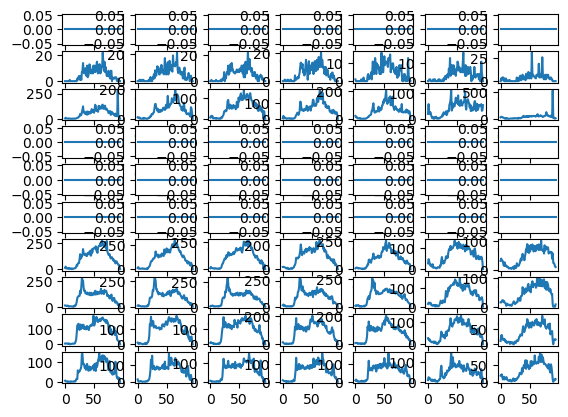

In [8]:
n_sections = 10#mat_q.shape[1]
fig, axes = plt.subplots(n_sections, 7)
for s in range(n_sections):
    week_data = collect_week(s)
    for d in range(7):
        axes[s][d].plot(week_data[d].cpu())
fig.show()

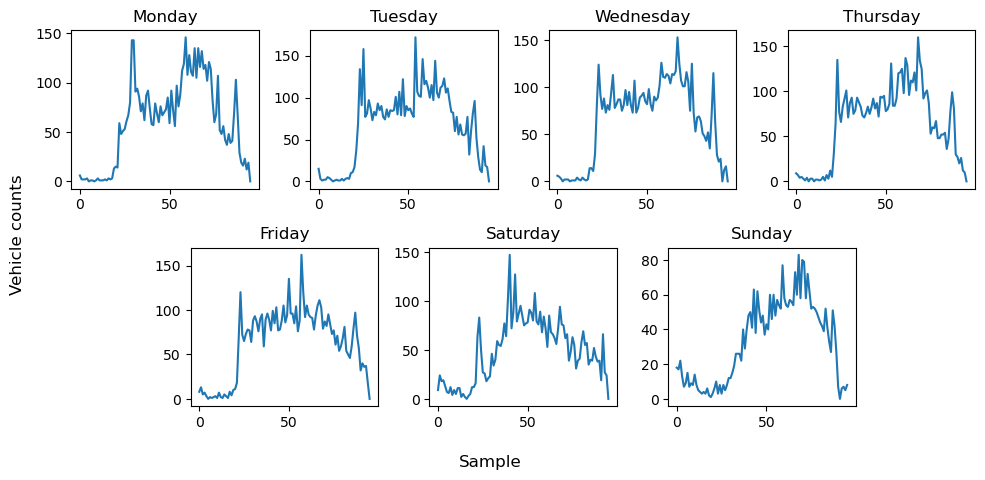

In [76]:
week_data = collect_week(9)
fig = plt.figure()
fig.set_figwidth(10)
gs = fig.add_gridspec(2, 8)
for d in range(4):
    axis = fig.add_subplot(gs[0, d * 2:d * 2 + 2])
    axis.plot(week_data[d].cpu())
    axis.set_title((begin_date + timedelta(days=d)).strftime('%A'))
for d in range(4, 7):
    axis = fig.add_subplot(gs[1, (d - 3) * 2 - 1:(d - 3) * 2 + 1])
    axis.plot(week_data[d].cpu())
    axis.set_title((begin_date + timedelta(days=d)).strftime('%A'))
fig.supxlabel('Sample')
fig.supylabel('Vehicle counts')
plt.tight_layout()